# 01_load_test_orig.ipynb

## Objective
This notebook aims to load the pre-trained YOLOv5n model (`yolov5n.pt`) already downloaded locally and test its inference on sample images and videos without any fine-tuning.

---

The YOLOv5n pre-trained model (80 classes) was downloaded from Ultralytics. For this stage of the project, only the classes of interest were selected: `['person', 'cat', 'dog', 'horse', 'sheep', 'cow']`.

---

## Steps:
1. Import the necessary libraries
2. Load the pre-trained YOLOv5n model
3. Test the model on sample images and videos
4. Display the results

In [24]:
# 1. Import required libraries
import torch
from pathlib import Path
import cv2
from matplotlib import pyplot as plt

In [25]:
# 2. Load the pre-trained YOLOv5n model
model_path = Path("./yolov5n.pt")
assert model_path.is_file(), f"Model not found at {model_path}"

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=str(model_path), force_reload=False)

Using cache found in C:\Users\fmula/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-29 Python-3.13.5 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [26]:
# 3. Test the model on a sample image
# For this example, place an image named "test_image.jpg" in the same folder
img_path = Path("./img1.jpg")
assert img_path.is_file(), f"Test image not found at {img_path}"

# Run inference
results = model(str(img_path))

C:\Users\fmula/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


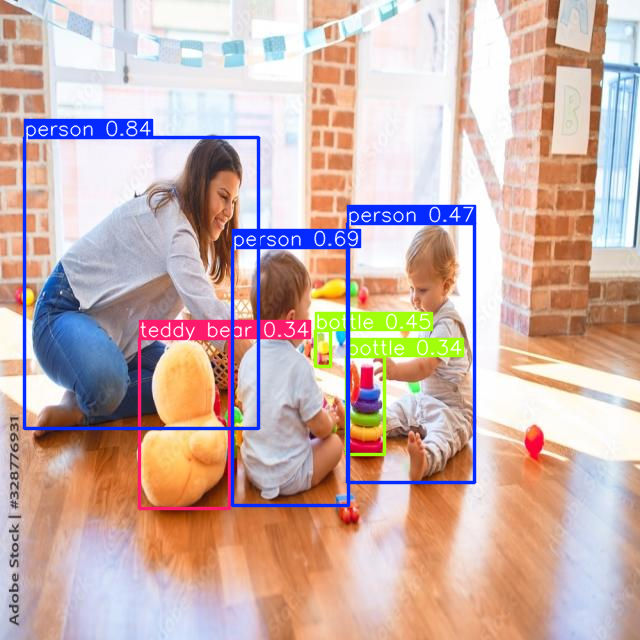

In [27]:
# 4. Display the results
results.show()  # This will open a window showing the image with detections

# To display within the notebook (Jupyter)
plt.imshow(results.render()[0])  # render() returns a list of numpy images with detections drawn
plt.axis('off')
plt.show()

In [6]:
# You can also access detailed results (e.g., labels, bounding boxes)
print(results.pandas().xyxy[0])  # pandas DataFrame with bounding boxes and confidence scores

           xmin        ymin         xmax        ymax  confidence  class  \
0    195.552307  435.718018   295.222137  713.602417    0.901315      0   
1     23.848667  426.347107   141.853851  698.408020    0.895987      0   
2    182.293594  128.703690   298.528625  413.254395    0.894124      0   
3    853.200500    8.717178  1032.884033  386.004089    0.883776      0   
4    120.854164  519.246765   208.705597  708.523743    0.880969      0   
5    663.791382  341.769653   871.459595  687.609497    0.844776      0   
6    532.495728  499.381958   661.826416  713.913940    0.837192      0   
7   1017.397095  467.970520  1131.047729  680.908020    0.785037      0   
8   1144.698120  507.720459  1229.601685  694.389526    0.765824      0   
9    982.253967  468.192169  1032.966675  521.736816    0.274979     29   
10  1066.734253  511.559082  1128.867310  680.152344    0.260940      0   

       name  
0    person  
1    person  
2    person  
3    person  
4    person  
5    person  
6

In [ ]:
# Showing som metrics for original model
from ultralytics import YOLO

model = YOLO('yolov5n.pt')
metrics = model.val(data='dataset/data_original.yaml', task='test', batch=16)
print(metrics)

PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.160  Python-3.13.5 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i5-1334U)
YOLOv5n summary (fused): 84 layers, 2,649,200 parameters, 0 gradients, 7.7 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 72.231.7 MB/s, size: 42.7 KB)


val: Scanning C:\Users\fmula\Documents\Yoobee\Subjects\Term_2\Intelligent_TS\Assessment_2\ITS2_AI_Driveway\dataset\test\labels... 117 images, 2 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 1849.63it/s]

val: New cache created: C:\Users\fmula\Documents\Yoobee\Subjects\Term_2\Intelligent_TS\Assessment_2\ITS2_AI_Driveway\dataset\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


                   all        117        246      0.792      0.854      0.863      0.557
                person        115        246      0.792      0.854      0.863      0.557
Speed: 1.1ms preprocess, 58.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs\test\val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021DBC5963C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.0260